# Initialize data

In [17]:
# Insert parent directory in path
import sys
sys.path.insert(0, '..')

# Import needed modules
import tensorflow as tf
import numpy as np
import seaborn as sns
import librosa
%pylab inline

# Import project's classes
from models.SpeechRecognizer import SpeechRecognizer
from models.AcousticModel import AcousticModel
import util.audioprocessor as audioprocessor
import util.dataprocessor as dataprocessor

# Set needed parameters
max_input_seq_length = 250
signal_processing = "fbank"
batch_size = 10
max_target_seq_length = 100
char_map = [
            # Apostrophes with one or two letters
            "'d", "'ll", "'m", "'nt", "'s", "s'", "'t", "'ve",
            # Double letters first
            'bb', 'cc', 'dd', 'ee', 'ff', 'gg', 'ii', 'kk', 'll', 'mm', 'nn',
            'oo', 'pp', 'rr', 'ss', 'tt', 'uu', 'zz',
            # Alphabet normal and capital
            'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
            'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
            'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
            'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
            # Apostrophe only for specific cases (eg. : O'clock)
            "'",
            # "end of sentence" character for CTC algorithm
            '_'
            ]

Populating the interactive namespace from numpy and matplotlib


In [2]:
speech_reco = SpeechRecognizer("english")
training_dataset_dirs = "/home/media/speech_data/small_dataset/training"
test_dataset_dirs = "/home/media/speech_data/small_dataset/valid"
train_set, test_set = speech_reco.load_acoustic_dataset(training_dataset_dirs, test_dataset_dirs)

# Check one line

In [3]:
train_set[0]

['/home/media/speech_data/small_dataset/training/flac_4/eng-I_have_spilt.flac',
 'i have spilt']

# Experiment on padding

In [18]:
# Read the audio file
sig, sr = librosa.load(train_set[0][0], mono=True)
print(sig.shape)
print(sr)

(35280,)
22050


In [19]:
# build a padded version of the audio signal
padded_sig = librosa.util.fix_length(sig, 66150)
print(sig.shape)
print(sr)

(35280,)
22050


/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


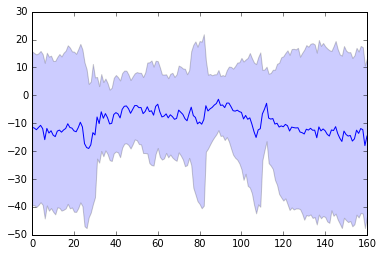

In [20]:
# Compute librosa's MFCC
mfcc, length = audioprocessor.AudioProcessor._extract_mfcc(sig, sr, max_input_seq_length)
sns.tsplot(mfcc.transpose())

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


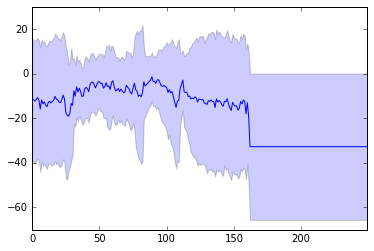

In [21]:
mfcc_padded_before, length_padded_before = audioprocessor.AudioProcessor._extract_mfcc(padded_sig, sr, max_input_seq_length)
sns.tsplot(mfcc_padded_before.transpose())

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


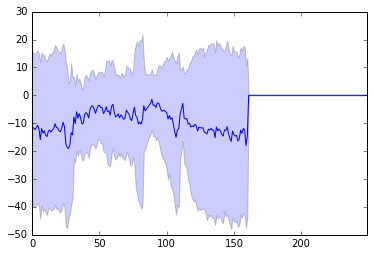

In [22]:
pad_length = max(max_input_seq_length - length, 0)
padding = np.zeros((pad_length, mfcc.shape[1]), dtype=np.float)
mfcc_padded_after = np.concatenate((mfcc, padding), 0)
sns.tsplot(mfcc_padded_after.transpose())

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


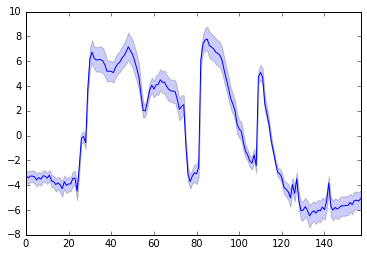

In [23]:
# Compute fbank
mfcc, length = audioprocessor.AudioProcessor._extract_fbank(sig, sr, max_input_seq_length)
sns.tsplot(mfcc.transpose())

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


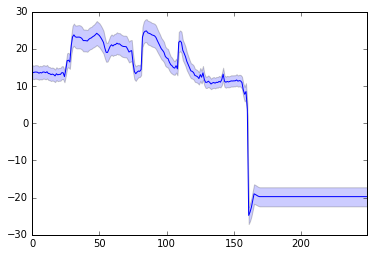

In [24]:
mfcc_padded_before, length_padded_before = audioprocessor.AudioProcessor._extract_fbank(padded_sig, sr, max_input_seq_length)
sns.tsplot(mfcc_padded_before.transpose())

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


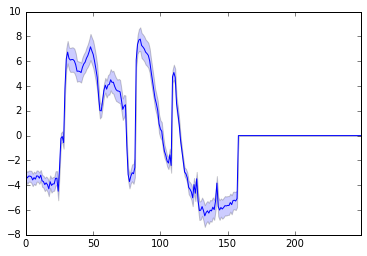

In [25]:
pad_length = max(max_input_seq_length - length, 0)
padding = np.zeros((pad_length, mfcc.shape[1]), dtype=np.float)
mfcc_padded_after = np.concatenate((mfcc, padding), 0)
sns.tsplot(mfcc_padded_after.transpose())

# Build the dataset

In [26]:
train_dataset = AcousticModel.build_dataset(train_set, batch_size, max_input_seq_length, max_target_seq_length,
                                            signal_processing, char_map)

In [27]:
iterator = train_dataset.make_initializable_iterator()
iterator_get_next_op = iterator.get_next()
with tf.Session() as sess:
    sess.run(iterator.initializer)
    input_dataset, input_length_dataset, label_dataset = sess.run(iterator_get_next_op)

In [28]:
input_dataset[0].shape

(250, 120)

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


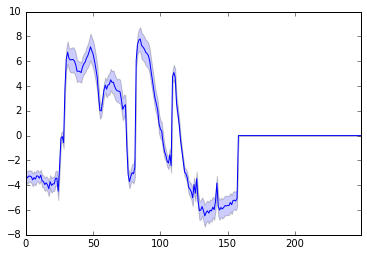

In [29]:
sns.tsplot(input_dataset[0].transpose())
#sns.tsplot(input_dataset[1].transpose())
#sns.tsplot(input_dataset[2].transpose())